In [1]:
from PIL import Image
import numpy as np
import os
import torch
from diffusers import DDIMScheduler,StableDiffusionXLInpaintPipeline
from torchvision.utils import save_image
from pytorch_lightning import seed_everything
from matplotlib import pyplot as plt
torch.cuda.set_device(0)  # set the GPU device

/usr/local/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
#scheduler = DPMSolverMultistepScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear",solver_order=3)
base = StableDiffusionXLInpaintPipeline.from_pretrained(
    "/hy-tmp/stable-diffusion-xl-base-1.0",
    #custom_pipeline="/hy-tmp/MyREMOVAL/SDXL_inp_pipeline.py",
    scheduler=scheduler,
    variant="fp16",
    use_safetensors=True,
    torch_dtype=torch.float16,
).to(device)

""" refiner = StableDiffusionXLInpaintPipeline.from_pretrained(
    "/hy-tmp/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    scheduler=scheduler,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to(device) """

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00,  6.26it/s]


In [3]:
image_path = "/hy-tmp/MyREMOVAL/workdir/bertrand1024/sample_0/result_step50_layer34.png"
mask_image_path = "/hy-tmp/MyREMOVAL/examples/mask/bertrand1024_mask.png"
prompt = ""
image_sc = Image.open(image_path).convert('RGB')
mask = Image.open(mask_image_path)
seed=777
g = torch.Generator('cuda').manual_seed(seed)

In [4]:
image_base = base(
    prompt=prompt,
    image=image_sc,
    height=1024,
    width=1024,
    strength=0.7,
    mask_image=mask,
    generator=g,
    num_inference_steps=50,
    guidance_scale=1,
    output_type="latent"
).images[0]
#image.save("result_+inp.png") 

' image_base = base(\n    prompt=prompt,\n    image=image_sc,\n    height=1024,\n    width=1024,\n    strength=0.7,\n    mask_image=mask,\n    generator=g,\n    num_inference_steps=50,\n    guidance_scale=1,\n    output_type="latent"\n).images[0]\n#image.save("result_+inp.png") '

100%|██████████| 15/15 [00:04<00:00,  3.23it/s]


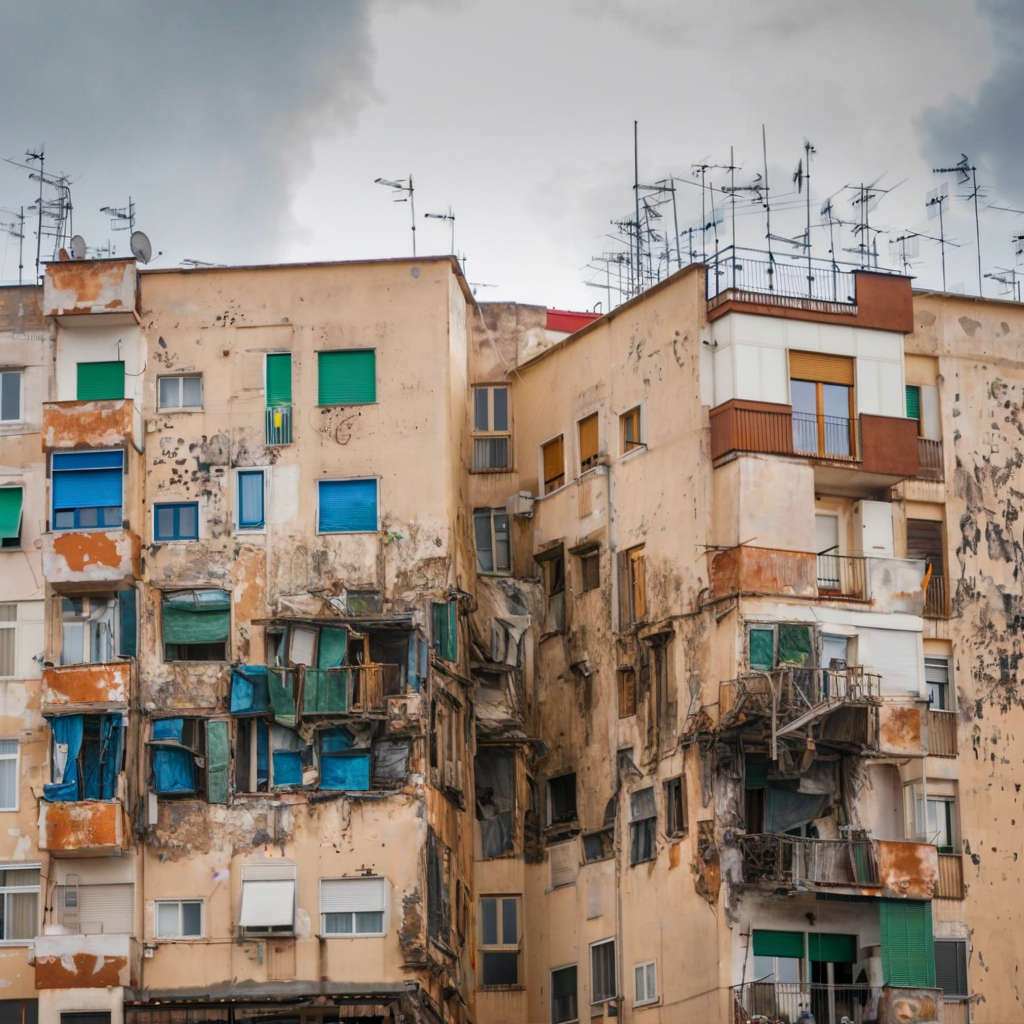

In [5]:
""" #image = refiner(prompt=prompt, mask_image = mask,generator=g,image=image_base[None, :],num_inference_steps=50,strength=0.3).images[0]
image = refiner(prompt=prompt, mask_image = mask,generator=g,image=image_sc,num_inference_steps=50,strength=0.3).images[0]
image.save("result_+ref.png")
image """